In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

___
**On supprime les données incomplètes et on affiche les données**


In [2]:
data = pd.read_csv("spam.csv")
data.dropna()
data.head()
display(data)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


**On sépare les différentes colonnes en listes**

In [3]:
datalist = data.values.tolist()
unknown = [[datalist[_][0]] for _ in range(len(datalist))]
label = [[datalist[_][1]] for _ in range(len(datalist))]
text = [[datalist[_][2]] for _ in range(len(datalist))]
is_spam = [datalist[_][3] for _ in range(len(datalist))]

In [4]:
print(unknown[0])
print(label[0])
print(text[0])
print(is_spam[0])

[605]
['ham']
["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."]
0


**On sépare les spams et les hams**

In [5]:
text_spam = []
text_ham = []
for i in range(len(text)):
    if is_spam[i] == 1:
        text_spam.append(text[i])
    else :
        text_ham.append(text[i])

**On prend 80% pour le l'entrainement et 20% pour les tests**

In [6]:
text_spam_train = text_spam[:int(80*len(text_spam)/100)]
text_ham_train = text_ham[:int(80*len(text_ham)/100)]

text_spam_test = text_spam[int(80*len(text_spam)/100):]
text_ham_test = text_ham[int(80*len(text_ham)/100):]

**On crée une fonction qui calcule la probabilité que le mot apparaisse dans un texte**

In [7]:
import re

def text_dict(liste_text):
    nb_mots = 0
    L = dict()
    for i in range(len(liste_text)):
        liste_mots = re.findall(r"[\w]+", liste_text[i][0])
        nb_mots += len(liste_mots)
        for mot in liste_mots:
            if len(mot)>3:
                if mot in L:
                    L[mot]+=1
                else :
                    L[mot]=1
    for mot in L:
        L[mot] /= nb_mots
    return L

**On crée donc un dictionnaire contenant la probabilité qu'un mot appraisse dans un spam**

In [8]:
dict_spam = text_dict(text_spam_train)

**On fait pareil pour les hams**

In [9]:
dict_ham = text_dict(text_ham_train)

**On combine les deux dictionaires précédents pour obtenir a chaque mot la probabilité qu'il apparaisse dans un ham ou dans un spam**

In [10]:
dict_ham_spam = dict()
for mot,val in dict_ham.items():
    dict_ham_spam[mot] = [val,0]
for mot,val in dict_spam.items():
    if mot in dict_ham_spam:
        dict_ham_spam[mot][1] += val
    else:
        dict_ham_spam[mot] = [0,val]

print(dict_ham_spam)

{'Subject': [0.006410998015799388, 0.005386585201491531], 'enron': [0.011676005579336374, 0], 'methanol': [0.00018335847236198454, 0], 'meter': [0.004103737238577749, 0], '988291': [6.548516870070877e-06, 0], 'this': [0.00843885540656467, 0.007947347140482501], 'follow': [0.00017244427757853308, 0.0002246282402623658], 'note': [0.00034925423307044675, 0.0002021654162361292], 'gave': [7.639936348416024e-05, 2.6955388831483896e-05], 'monday': [0.00043875063029474875, 0.00010782155532593558], 'preliminary': [0.00010259343096444374, 4.492564805247316e-06], 'flow': [0.0011634531639159258, 8.985129610494631e-05], 'data': [0.0003601684278538982, 0.00021564311065187117], 'provided': [0.00011132478679120491, 0.0003144795363673121], 'daren': [0.0032764412739921286, 0], 'please': [0.004684372401057367, 0.0017251448852149693], 'override': [1.091419478345146e-05, 0], 'daily': [0.0009800946915539412, 9.883642571544094e-05], 'volume': [0.001486513329506089, 8.086616649445168e-05], 'presently': [2.182

**Grâce a la loi de Bayes on calcule la probabilité qu'un texte contenant (ou pas) un mot soit un spam**

In [11]:
dict_proba = {mot : dict_ham_spam[mot][1]/(dict_ham_spam[mot][0] + dict_ham_spam[mot][1]) for mot in dict_ham_spam}
print(sorted(dict_proba.items(), key=lambda item: item[1], reverse=True))

[('photoshop', 1.0), ('trending', 1.0), ('abasements', 1.0), ('darer', 1.0), ('prudently', 1.0), ('fortuitous', 1.0), ('undergone', 1.0), ('lighthearted', 1.0), ('orinoco', 1.0), ('taster', 1.0), ('affluent', 1.0), ('pornographic', 1.0), ('cuvier', 1.0), ('irvin', 1.0), ('parkhouse', 1.0), ('blameworthy', 1.0), ('chlorophyll', 1.0), ('robed', 1.0), ('diagrammatic', 1.0), ('fogarty', 1.0), ('clears', 1.0), ('bayda', 1.0), ('inconveniencing', 1.0), ('smartness', 1.0), ('hashish', 1.0), ('academies', 1.0), ('unload', 1.0), ('badness', 1.0), ('caffein', 1.0), ('spaniard', 1.0), ('chargeable', 1.0), ('levin', 1.0), ('ruin', 1.0), ('excuse', 1.0), ('simpliest', 1.0), ('perscription', 1.0), ('rightly', 1.0), ('pound', 1.0), ('squint', 1.0), ('erection', 1.0), ('pills', 1.0), ('anti', 1.0), ('depressant', 1.0), ('splicings', 1.0), ('bombahakcx', 1.0), ('synonymous', 1.0), ('moneyback', 1.0), ('sufficeth', 1.0), ('herself', 1.0), ('hath', 1.0), ('author', 1.0), ('vocable', 1.0), ('asceticism', 

**On isole les mots caractéristiques**

In [12]:
dict_caract = {mot : dict_proba[mot] for mot in dict_proba if abs(0.5-dict_proba[mot])>0.2}
print(sorted(dict_caract.items(), key=lambda item: item[1], reverse=True))

[('photoshop', 1.0), ('trending', 1.0), ('abasements', 1.0), ('darer', 1.0), ('prudently', 1.0), ('fortuitous', 1.0), ('undergone', 1.0), ('lighthearted', 1.0), ('orinoco', 1.0), ('taster', 1.0), ('affluent', 1.0), ('pornographic', 1.0), ('cuvier', 1.0), ('irvin', 1.0), ('parkhouse', 1.0), ('blameworthy', 1.0), ('chlorophyll', 1.0), ('robed', 1.0), ('diagrammatic', 1.0), ('fogarty', 1.0), ('clears', 1.0), ('bayda', 1.0), ('inconveniencing', 1.0), ('smartness', 1.0), ('hashish', 1.0), ('academies', 1.0), ('unload', 1.0), ('badness', 1.0), ('caffein', 1.0), ('spaniard', 1.0), ('chargeable', 1.0), ('levin', 1.0), ('ruin', 1.0), ('excuse', 1.0), ('simpliest', 1.0), ('perscription', 1.0), ('rightly', 1.0), ('pound', 1.0), ('squint', 1.0), ('erection', 1.0), ('pills', 1.0), ('anti', 1.0), ('depressant', 1.0), ('splicings', 1.0), ('bombahakcx', 1.0), ('synonymous', 1.0), ('moneyback', 1.0), ('sufficeth', 1.0), ('herself', 1.0), ('hath', 1.0), ('author', 1.0), ('vocable', 1.0), ('asceticism', 

**On crée une fonction de test sur un texte pour savoir s'il y a de forte chance que ça soit un spam ou non**

In [13]:
import math
def test_spam(str):
    liste_mots = re.findall(r"[\w]+", str)
    P_spam = 0
    for mot in liste_mots:
        if mot in dict_caract:
            P_spam = math.log(dict_caract[mot]+1e-100)
    return math.exp(P_spam)

print(text_spam_test[42][0])
print(" ----- ")
print(f"Il y a {test_spam(text_spam_test[42][0])*100}% de chance que le message soit un spam\n")

Subject: no more wife unsatisfied ! hey it works : )
content - type : text / plain ;
content - transfer - encoding : quoted - printable
this is the break your waiting for , soft tabs , a generic cialis but better =
, it dissolves in you mouth which will go directly to you blood stream . 15 =
minutes or less to feel the hardness going on .
visit our website for more info .
r ! emove !

 ----- 
Il y a 100.0% de chance que le message soit un spam



In [14]:
print(text_ham_test[42][0])
print(" ----- ")
print(f"Il y a {test_spam(text_ham_test[42][0])*100}% de chance que le message soit un spam")

Subject: intraday eastrans nominations change for 9 / 6 / 00 and nomination for
9 / 7 / 00
deliveries continue to be 30 , 000 mmbtu / dy
the redeliveries will be :
8500 from fuels cotton valley
10955 to hpl ' s cartwheel agreement at carthage
10545 at mobil beaumont
effective for 9 / 7 / 00 , deliveries to eastrans continue to be 30 , 000 mmbtu / dy
the redeliveries will be :
8500 from fuels cotton valley
21500 to hpl ' s cartwheel agreement at carthage
 ----- 
Il y a 5.455640629709553% de chance que le message soit un spam


**On test la fonction sur l'ensemble de test pour obtenir un pourcentage de réussite**

84.66666666666667% des spams sont détecté
93.87755102040816% des hams sont détecté
91.20772946859903% des messages ont bien été détecté

nombre de messages detectés en fonction du pourcentage que le message soit un spam, parmi les spams


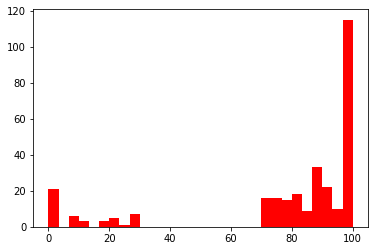


nombre de messages detectés en fonction du pourcentage que le message soit un spam, parmi les hams


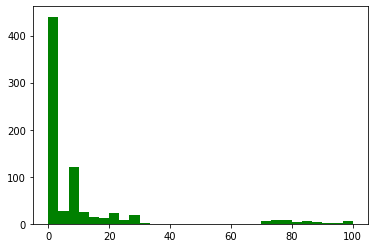

In [15]:
point_spam=[]
S1 = 0
for text in text_spam_test:
    point_spam.append(round(test_spam(text[0])*100,0))
    if test_spam(text[0])>0.5:
        S1 += 1
accuracy_spam = S1/len(text_spam_test)

point_ham=[]
S2 = 0
for text in text_ham_test:
    point_ham.append(round(test_spam(text[0])*100,0))
    if test_spam(text[0])<0.5:
        S2 += 1
accuracy_ham = S2/len(text_ham_test)

accuracy = (S1+S2)/(len(text_ham_test)+len(text_spam_test))

print(f"{accuracy_spam*100}% des spams sont détecté\n{accuracy_ham*100}% des hams sont détecté\n{accuracy*100}% des messages ont bien été détecté")

print("")
print("nombre de messages detectés en fonction du pourcentage que le message soit un spam, parmi les spams")
plt.figure( figsize=(6, 4))
plt.hist(point_spam,bins=30,color='red')
plt.show()

print("")
print("nombre de messages detectés en fonction du pourcentage que le message soit un spam, parmi les hams")
plt.figure( figsize=(6, 4))
plt.hist(point_ham,bins=30,color='green')
plt.show()